<a href="https://colab.research.google.com/github/kastalaa/NLPCW1/blob/main/NLP_CW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
Data1=pd.read_csv("/content/drive/MyDrive/WASSA23_essay_level_with_labels_train (3).tsv",sep='\t')

In [3]:
Data1=pd.DataFrame(Data1)

In [4]:
ND1=pd.DataFrame(Data1)

In [5]:
ND1['empathy'].unique()

array([6.83333333, 5.83333333, 1.        , 6.16666667, 1.66666667,
       1.5       , 2.        , 6.        , 7.        , 6.66666667,
       3.5       , 1.83333333, 4.        , 3.66666667, 1.16666667,
       6.33333333, 4.16666667, 5.66666667, 4.83333333, 4.33333333,
       4.5       , 5.33333333, 1.33333333, 3.33333333, 2.33333333,
       5.5       , 2.5       , 2.66666667, 3.        , 3.83333333,
       6.5       , 5.        , 2.16666667, 5.16666667, 2.83333333,
       3.16666667, 4.66666667])

In [6]:
ND1['personality_conscientiousness'].unique()

array(['7.0', '5.5', '6.75', '6.0', '3.5', 'unknown', '6.25', '6.5',
       '4.25', '2.5', '4.0', '4.5'], dtype=object)

In [7]:
ND1['personality_openess'].unique()

array(['5.5', '5.0', '6.75', '6.0', '2.5', '3.5', '4.5', 'unknown',
       '5.75', '7.0', '4.25', '2.0', '6.5', '4.0'], dtype=object)

In [8]:
ND1['personality_extraversion'].unique()

array(['1.0', '2.0', '6.75', '5.0', '6.5', '1.5', 'unknown', '3.25',
       '2.5', '4.5', '3.0', '3.5', '4.0', '6.0', '7.0', '5.5', '5.75'],
      dtype=object)

In [9]:
ND1['personality_agreeableness'].unique()

array(['6.5', '5.5', '6.75', '4.5', '7.0', 'unknown', '5.0', '6.0', '3.5',
       '4.25', '2.0', '2.5', '4.0'], dtype=object)

In [10]:
ND1['personality_stability'].unique()

array(['6.0', '4.5', '7.0', '3.5', '5.0', '6.5', 'unknown', '4.0', '3.75',
       '1.0', '5.5', '1.5', '3.0', '2.0', '2.5'], dtype=object)

In [11]:
ND1['emotion'].unique()

array(['Hope/Sadness', 'Anger', 'Sadness', 'Neutral', 'Disgust/Sadness',
       'Anger/Disgust', 'Fear/Sadness', 'Joy', 'Hope', 'Joy/Neutral',
       'Disgust', 'Neutral/Sadness', 'Neutral/Surprise', 'Anger/Neutral',
       'Hope/Neutral', 'Surprise', 'Anger/Sadness', 'Fear', 'Anger/Joy',
       'Disgust/Fear', 'Fear/Neutral', 'Fear/Hope', 'Joy/Sadness',
       'Anger/Disgust/Sadness', 'Anger/Surprise', 'Disgust/Neutral',
       'Anger/Fear', 'Sadness/Surprise', 'Disgust/Surprise', 'Anger/Hope'],
      dtype=object)

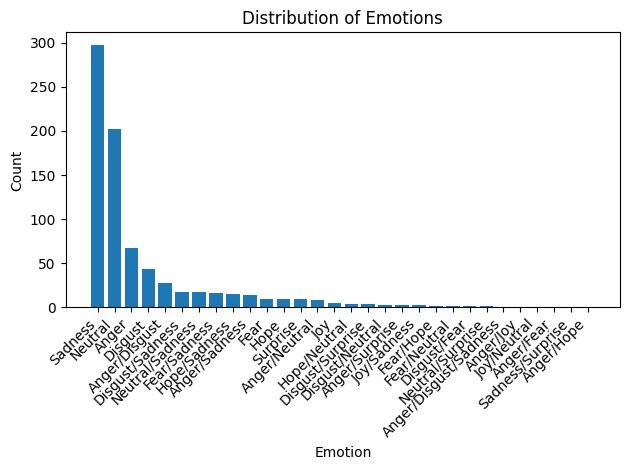

In [14]:
# Count the occurrences of each emotion
emotion_counts = ND1['emotion'].value_counts()

# Import the matplotlib.pyplot module
import matplotlib.pyplot as plt

# Create a bar chart
plt.bar(emotion_counts.index, emotion_counts.values)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
le = LabelEncoder()
ND1['emotion'] = le.fit_transform(ND1['emotion'])


In [17]:
# Convert personality columns to float
personality_column = [
    'personality_conscientiousness', 'personality_openess',
    'personality_extraversion', 'personality_agreeableness',
    'personality_stability'
]

for cols in personality_column:
    ND1[cols] = pd.to_numeric(ND1[cols], errors='coerce')

In [18]:
 ND1['personality_conscientiousness']=ND1['personality_conscientiousness'].replace('-', '', regex=True)

In [19]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(ND1[personality_column + ['empathy', 'distress']].replace('unknown', np.nan).astype(float))


In [20]:
# Adding scaled features to the DataFrame
for i, col in enumerate(personality_column + ['empathy', 'distress']):
    ND1[col] = scaled_features[:, i]

In [21]:
# Prepare data for classification
# Assuming 'ND' is your DataFrame containing the necessary columns
X = ND1[['essay', 'empathy', 'distress'] + personality_column]
y = ND1['emotion']

In [102]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

In [103]:
# Convert essays to feature vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_essay = vectorizer.fit_transform(X_train['essay']).toarray()
X_test_essay = vectorizer.transform(X_test['essay']).toarray()


In [104]:
# Combine TF-IDF vectors with other features
X_train_combined = pd.DataFrame(X_train_essay, columns=vectorizer.get_feature_names_out()).reset_index(drop=True)
X_train_combined = pd.concat([X_train_combined, X_train.drop(columns='essay').reset_index(drop=True)], axis=1)

X_test_combined = pd.DataFrame(X_test_essay, columns=vectorizer.get_feature_names_out()).reset_index(drop=True)
X_test_combined = pd.concat([X_test_combined, X_test.drop(columns='essay').reset_index(drop=True)], axis=1)

In [105]:
X_train_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Columns: 4305 entries, 000 to personality_stability
dtypes: float64(4305)
memory usage: 18.2 MB


In [98]:
# Combine TF-IDF vectors with other features, handling potential missing values
X_train_combined = pd.DataFrame(X_train_essay, columns=vectorizer.get_feature_names_out()).reset_index(drop=True)
X_train_combined = pd.concat([X_train_combined, X_train.drop(columns='essay').reset_index(drop=True)], axis=1)
X_train_combined = X_train_combined.fillna(0) # Fill missing values with 0

X_test_combined = pd.DataFrame(X_test_essay, columns=vectorizer.get_feature_names_out()).reset_index(drop=True)
X_test_combined = pd.concat([X_test_combined, X_test.drop(columns='essay').reset_index(drop=True)], axis=1)
X_test_combined = X_test_combined.fillna(0) # Fill missing values with 0

In [99]:
!pip install torch torchtext scikit-learn pandas matplotlib torch-geometric transformers


Training and Tuning CNN model:
Best Parameters: {'embed_dim': 100, 'num_filters': 128}
Best Validation Accuracy: 0.49056603773584906
Epoch 1/20
Train Loss: 1.7964, Val Loss: 1.9114
Val Accuracy: 0.4465, Val F1 Score: 0.3261

Epoch 2/20
Train Loss: 1.6876, Val Loss: 1.9144
Val Accuracy: 0.4969, Val F1 Score: 0.3979

Epoch 3/20
Train Loss: 1.6200, Val Loss: 1.9046
Val Accuracy: 0.4843, Val F1 Score: 0.4009

Epoch 4/20
Train Loss: 1.5140, Val Loss: 1.8901
Val Accuracy: 0.4591, Val F1 Score: 0.3623

Epoch 5/20
Train Loss: 1.4356, Val Loss: 1.8857
Val Accuracy: 0.4465, Val F1 Score: 0.3348

Epoch 6/20
Train Loss: 1.3086, Val Loss: 1.8833
Val Accuracy: 0.4780, Val F1 Score: 0.3831

Epoch 7/20
Train Loss: 1.2114, Val Loss: 1.8875
Val Accuracy: 0.5031, Val F1 Score: 0.4164

Epoch 8/20
Train Loss: 1.1111, Val Loss: 1.8850
Val Accuracy: 0.4969, Val F1 Score: 0.4191

Epoch 9/20
Train Loss: 1.0345, Val Loss: 1.8730
Val Accuracy: 0.4780, Val F1 Score: 0.3850

Epoch 10/20
Train Loss: 0.9363, Val Lo

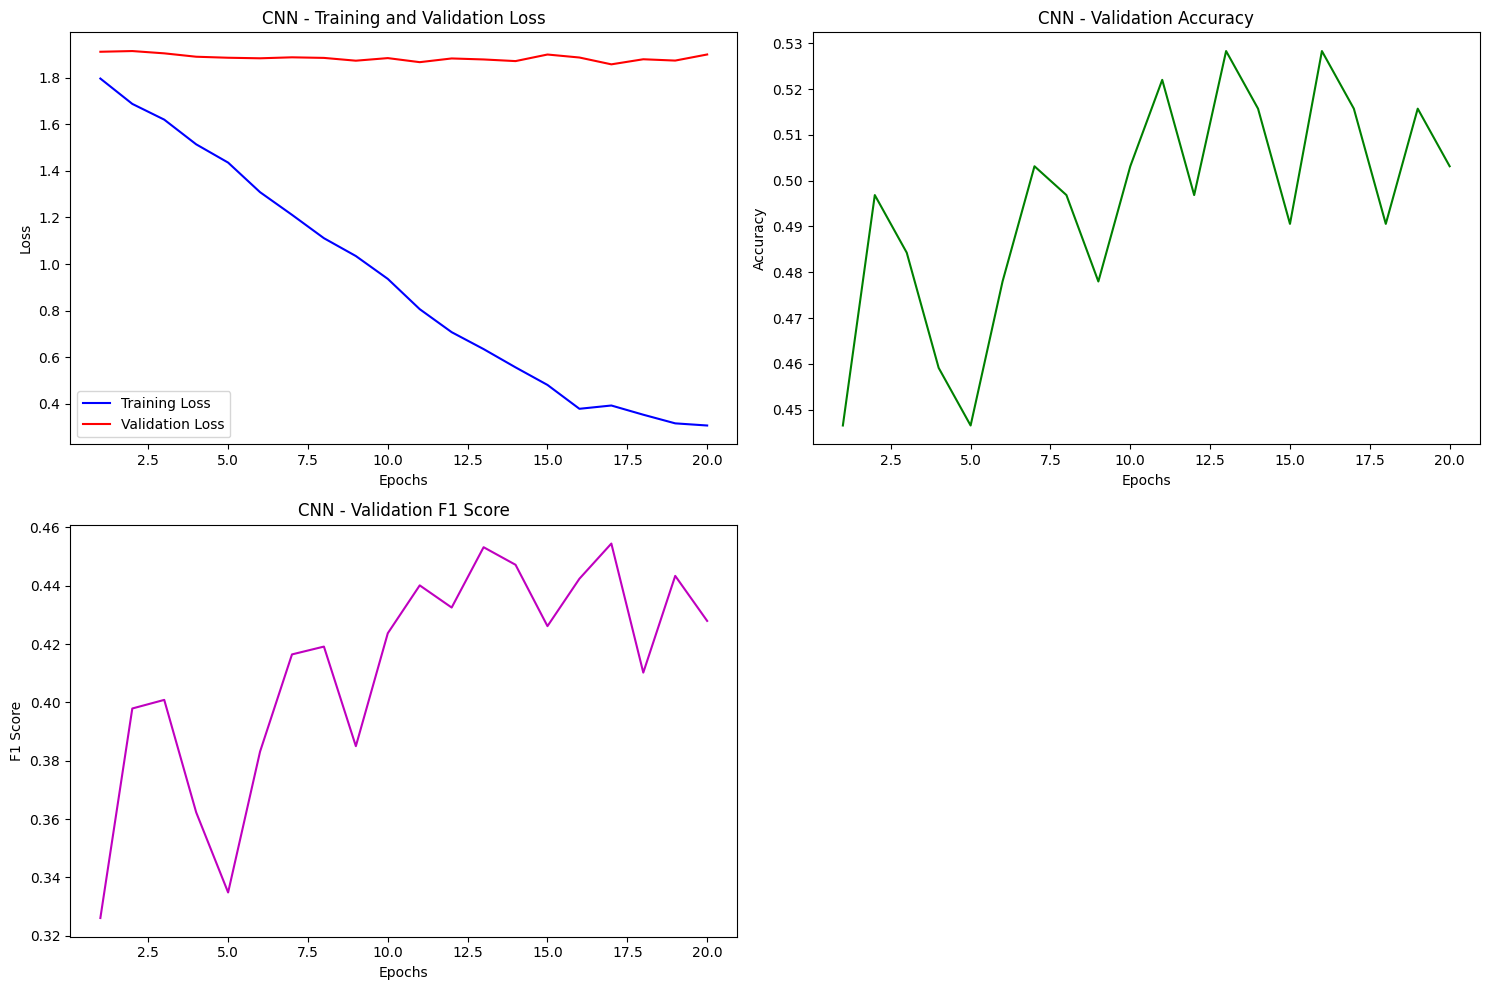


Training and Tuning RNN model:
Best Parameters: {'embed_dim': 100, 'hidden_dim': 128}
Best Validation Accuracy: 0.46540880503144655
Epoch 1/20
Train Loss: 1.7699, Val Loss: 2.0339
Val Accuracy: 0.4843, Val F1 Score: 0.3824

Epoch 2/20
Train Loss: 1.6542, Val Loss: 2.0253
Val Accuracy: 0.5031, Val F1 Score: 0.3981

Epoch 3/20
Train Loss: 1.5128, Val Loss: 2.0735
Val Accuracy: 0.4403, Val F1 Score: 0.3596

Epoch 4/20
Train Loss: 1.5246, Val Loss: 2.1100
Val Accuracy: 0.4340, Val F1 Score: 0.3538

Epoch 5/20
Train Loss: 1.4210, Val Loss: 2.1711
Val Accuracy: 0.4214, Val F1 Score: 0.3544

Epoch 6/20
Train Loss: 1.2905, Val Loss: 2.2450
Val Accuracy: 0.4214, Val F1 Score: 0.3630

Epoch 7/20
Train Loss: 1.1729, Val Loss: 2.2774
Val Accuracy: 0.4151, Val F1 Score: 0.3506

Epoch 8/20
Train Loss: 1.0900, Val Loss: 2.2860
Val Accuracy: 0.4151, Val F1 Score: 0.3694

Epoch 9/20
Train Loss: 1.0007, Val Loss: 2.3020
Val Accuracy: 0.4214, Val F1 Score: 0.3731

Epoch 10/20
Train Loss: 0.9452, Val Los

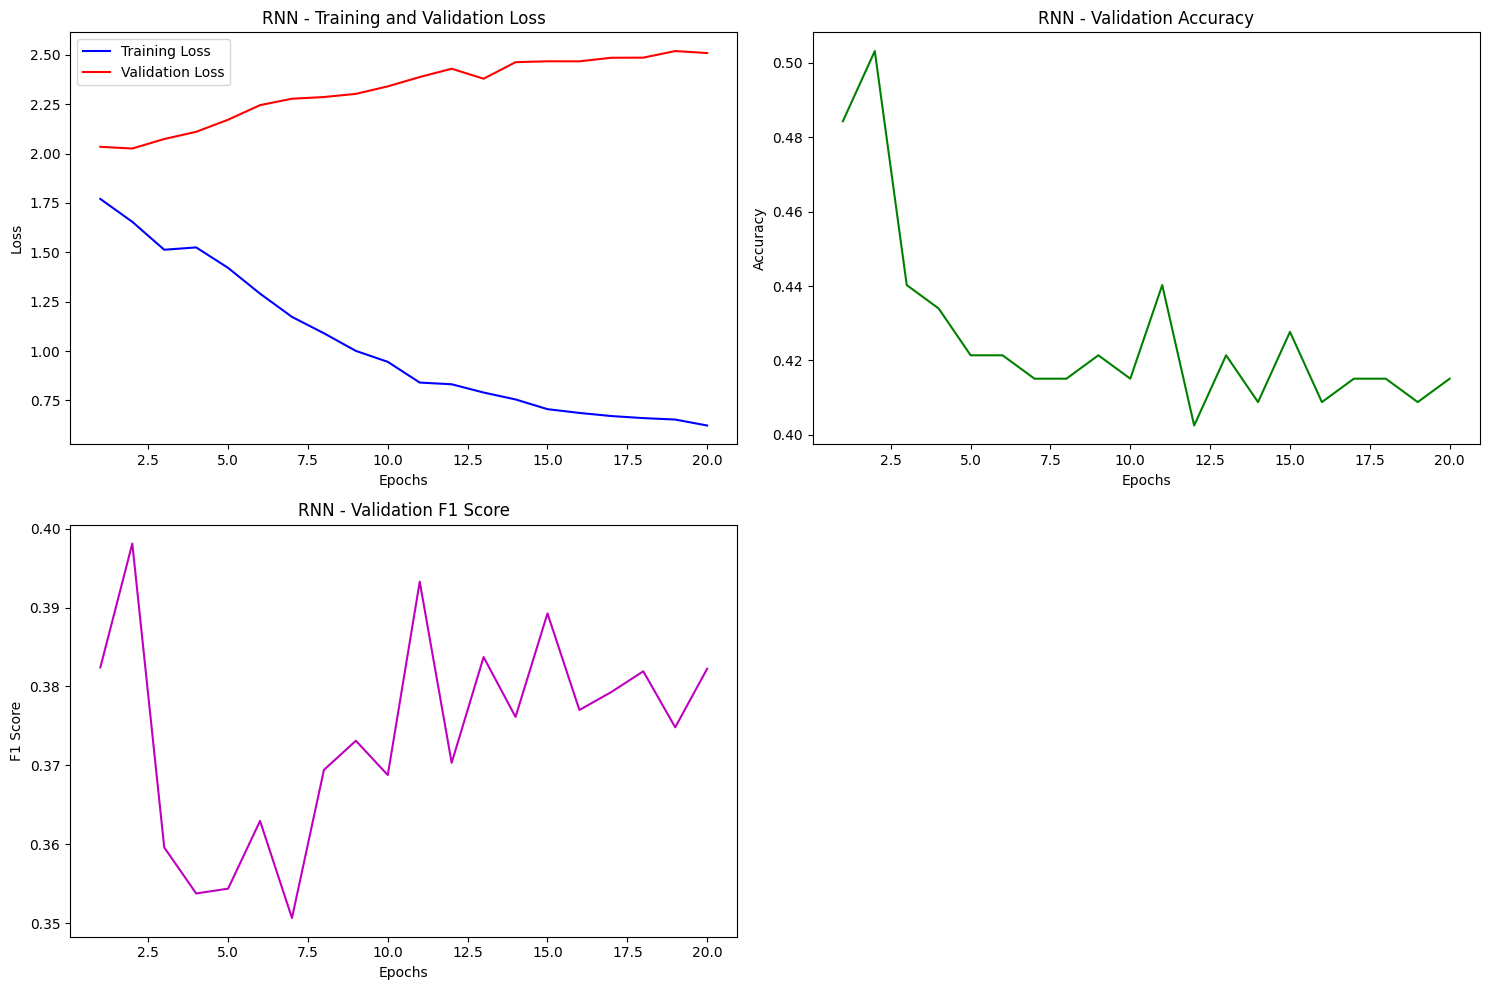


Training and Tuning MLP model:
Best Parameters: {'hidden_units': [128, 64]}
Best Validation Accuracy: 0.3584905660377358
Epoch 1/20
Train Loss: 8.3428, Val Loss: 3.2963
Val Accuracy: 0.3962, Val F1 Score: 0.2331

Epoch 2/20
Train Loss: 5.0084, Val Loss: 3.2637
Val Accuracy: 0.4025, Val F1 Score: 0.2347

Epoch 3/20
Train Loss: 4.3492, Val Loss: 3.2523
Val Accuracy: 0.4088, Val F1 Score: 0.2373

Epoch 4/20
Train Loss: 4.0828, Val Loss: 3.2293
Val Accuracy: 0.4088, Val F1 Score: 0.2373

Epoch 5/20
Train Loss: 3.3454, Val Loss: 3.2066
Val Accuracy: 0.4088, Val F1 Score: 0.2373

Epoch 6/20
Train Loss: 3.7125, Val Loss: 3.1842
Val Accuracy: 0.4088, Val F1 Score: 0.2373

Epoch 7/20
Train Loss: 3.4409, Val Loss: 3.1621
Val Accuracy: 0.4088, Val F1 Score: 0.2373

Epoch 8/20
Train Loss: 3.3422, Val Loss: 3.1399
Val Accuracy: 0.4088, Val F1 Score: 0.2373

Epoch 9/20
Train Loss: 3.3581, Val Loss: 3.1178
Val Accuracy: 0.4088, Val F1 Score: 0.2373

Epoch 10/20
Train Loss: 3.1571, Val Loss: 3.0961
V

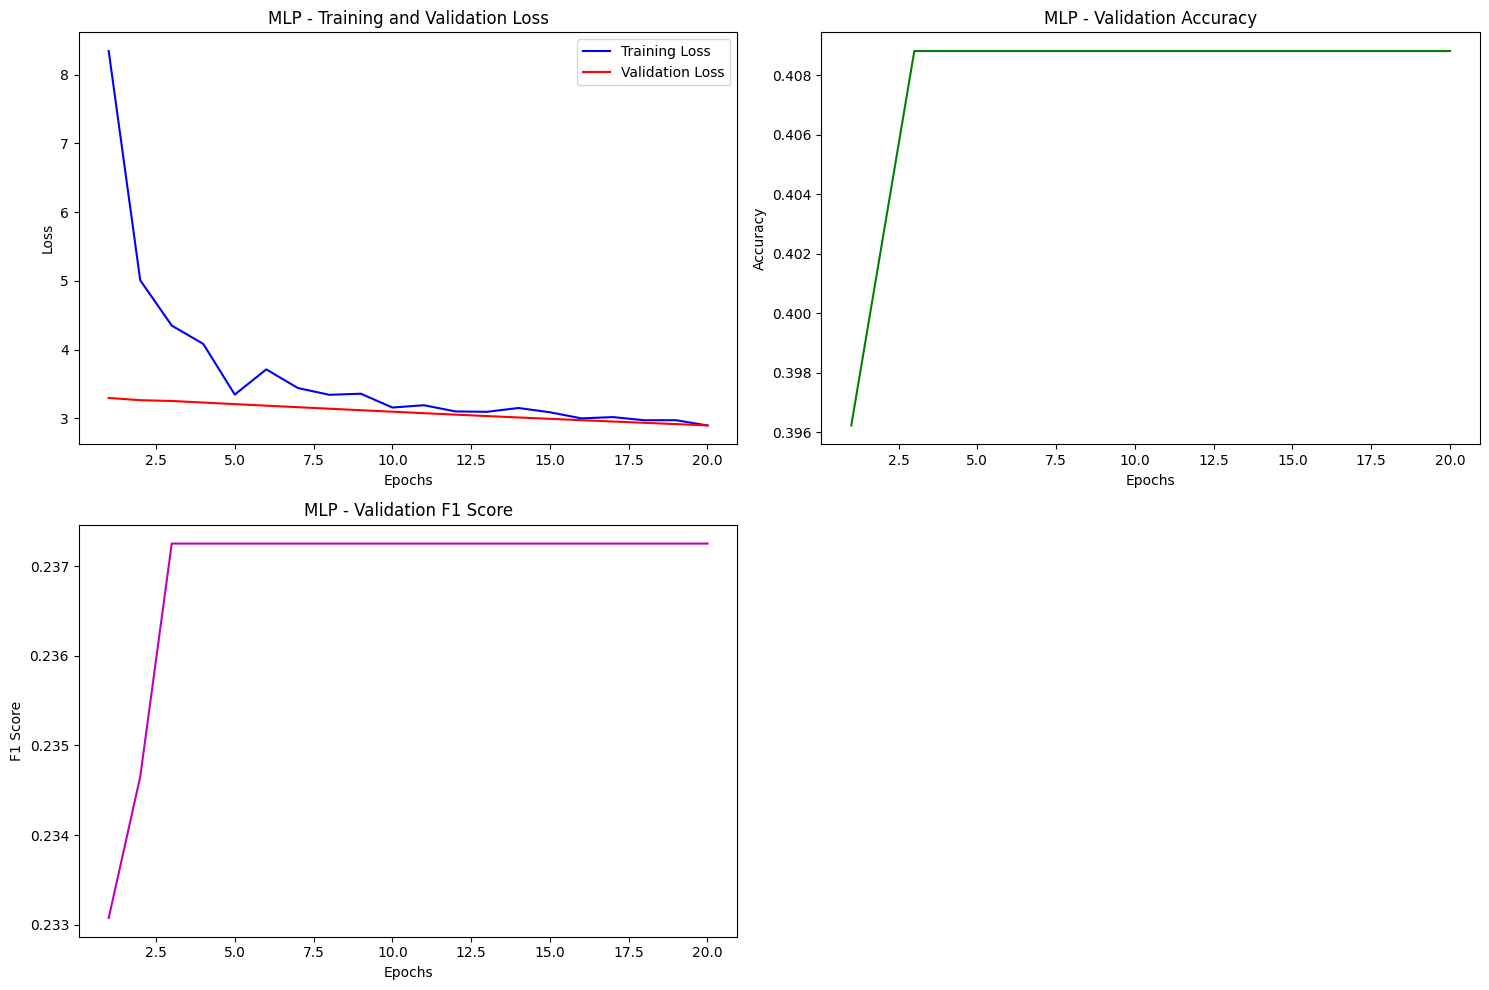


Training and Tuning Transformer model:
Best Parameters: {'embed_dim': 50, 'num_heads': 2, 'num_layers': 2}
Best Validation Accuracy: 0.42138364779874216
Epoch 1/20
Train Loss: 2.1893, Val Loss: 2.0535
Val Accuracy: 0.4214, Val F1 Score: 0.2865

Epoch 2/20
Train Loss: 2.1305, Val Loss: 1.9926
Val Accuracy: 0.4403, Val F1 Score: 0.3605

Epoch 3/20
Train Loss: 2.0142, Val Loss: 1.9486
Val Accuracy: 0.4780, Val F1 Score: 0.4003

Epoch 4/20
Train Loss: 1.9795, Val Loss: 1.9229
Val Accuracy: 0.4969, Val F1 Score: 0.4035

Epoch 5/20
Train Loss: 1.9558, Val Loss: 1.9228
Val Accuracy: 0.4969, Val F1 Score: 0.4005

Epoch 6/20
Train Loss: 1.8829, Val Loss: 1.9278
Val Accuracy: 0.4654, Val F1 Score: 0.3886

Epoch 7/20
Train Loss: 1.8644, Val Loss: 1.9233
Val Accuracy: 0.4780, Val F1 Score: 0.3704

Epoch 8/20
Train Loss: 1.8650, Val Loss: 1.9567
Val Accuracy: 0.5220, Val F1 Score: 0.4106

Epoch 9/20
Train Loss: 1.7919, Val Loss: 1.9734
Val Accuracy: 0.5346, Val F1 Score: 0.4227

Epoch 10/20
Train 

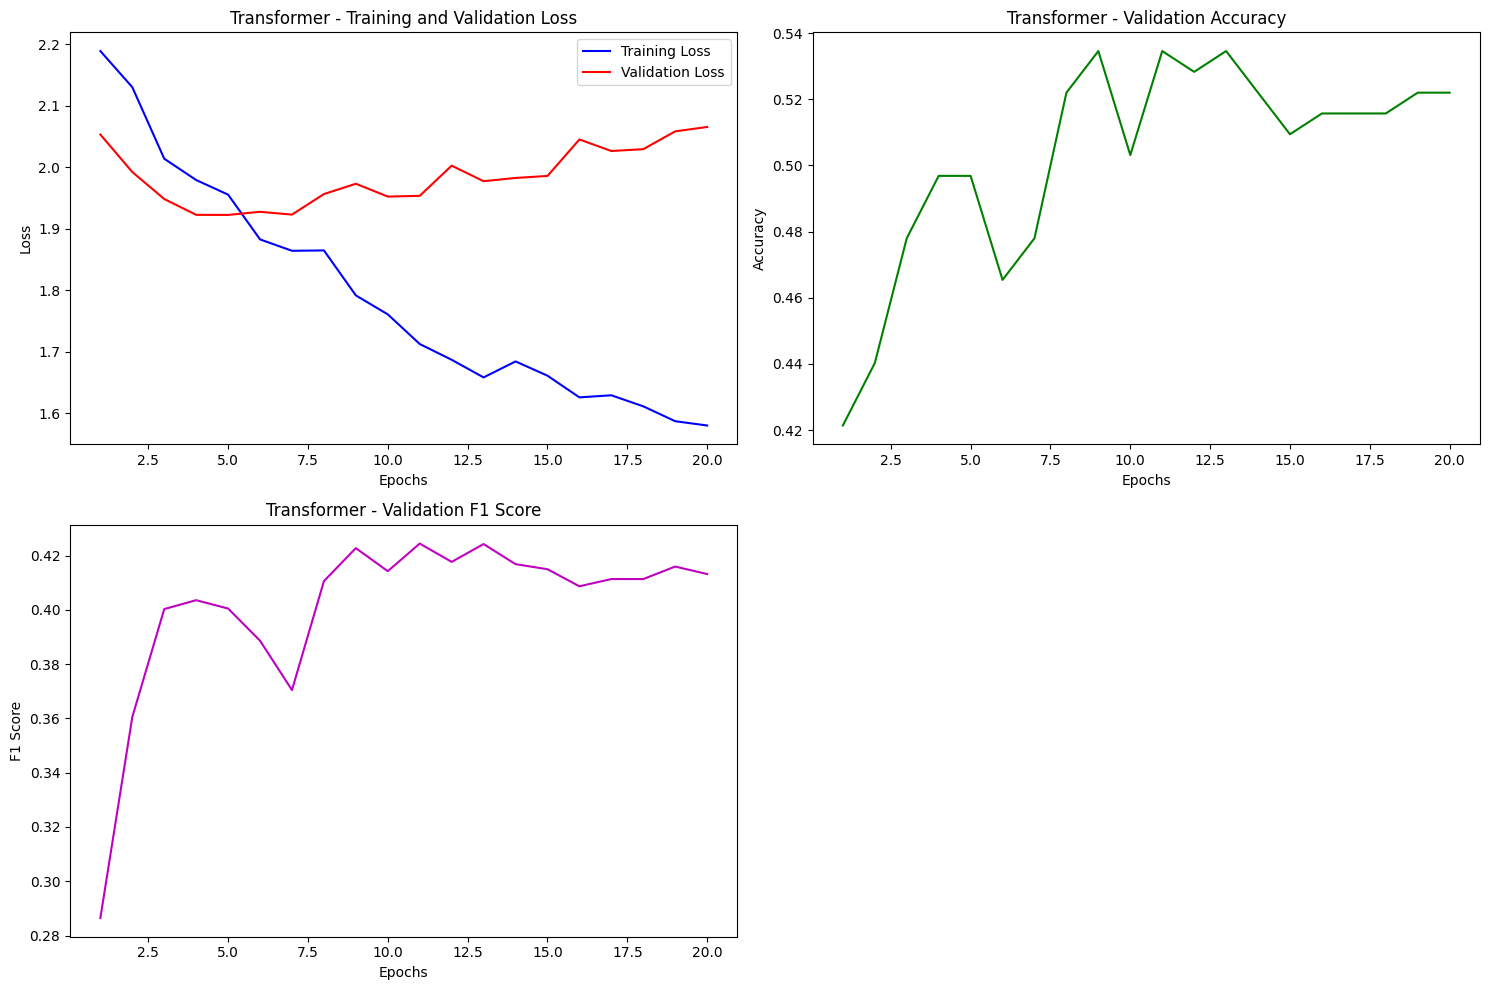

In [108]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import torch.nn.functional as F
import torchtext

torchtext.disable_torchtext_deprecation_warning()

class TextDataset(Dataset):
    def __init__(self, texts, labels, vocab, max_length):
        self.texts = [str(text) for text in texts]
        self.labels = [int(label) for label in labels]
        self.vocab = vocab
        self.max_length = max_length
        self.tokenizer = get_tokenizer("basic_english")

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        tokens = self.tokenizer(text)
        encoded = [self.vocab[token] for token in tokens]
        padded = encoded[:self.max_length] + [0] * (self.max_length - len(encoded))
        return torch.tensor(padded), torch.tensor(label)

class TextCNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes, max_length, num_filters=128):
        super(TextCNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.conv1 = nn.Conv1d(embed_dim, num_filters, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(num_filters, num_filters, kernel_size=3, padding=1)
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.fc = nn.Linear(num_filters, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.embedding(x).transpose(1, 2)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x).squeeze(-1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

class TextRNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_classes):
        super(TextRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.embedding(x)
        _, (hidden, _) = self.lstm(x)
        x = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

class MLP(nn.Module):
    def __init__(self, visible_units, hidden_units, num_classes):
        super(MLP, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(visible_units, hidden_units[0]))
        for i in range(1, len(hidden_units)):
            self.layers.append(nn.Linear(hidden_units[i-1], hidden_units[i]))
        self.layers.append(nn.Linear(hidden_units[-1], num_classes))
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = x.float()
        for layer in self.layers[:-1]:
            x = F.relu(layer(x))
            x = self.dropout(x)
        x = self.layers[-1](x)
        return x

class TextTransformer(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_heads, num_layers, num_classes):
        super(TextTransformer, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(embed_dim, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        x = x.mean(dim=1)  # Average pooling
        x = self.dropout(x)
        x = self.fc(x)
        return x

def train_and_tune_model(model_class, param_grid, train_loader, val_loader, criterion, num_epochs, device, vocab_size, num_classes, max_length):
    best_model = None
    best_accuracy = 0
    best_params = None

    for params in param_grid:
        if model_class == MLP:
            model = model_class(visible_units=max_length, num_classes=num_classes, **params).to(device)
        elif model_class == TextRNN:
            model = model_class(vocab_size=vocab_size, num_classes=num_classes, **params).to(device)
        elif model_class == TextTransformer:
            model = model_class(vocab_size=vocab_size, num_classes=num_classes, **params).to(device)
        else:
            model = model_class(vocab_size=vocab_size, num_classes=num_classes, max_length=max_length, **params).to(device)

        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

        for epoch in range(5):  # Reduced number of epochs for faster grid search
            model.train()
            for texts, labels in train_loader:
                texts, labels = texts.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(texts)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            scheduler.step(loss)

            model.eval()
            val_preds, val_true = [], []
            with torch.no_grad():
                for texts, labels in val_loader:
                    texts, labels = texts.to(device), labels.to(device)
                    outputs = model(texts)
                    val_preds.extend(outputs.argmax(dim=1).cpu().numpy())
                    val_true.extend(labels.cpu().numpy())

            accuracy = accuracy_score(val_true, val_preds)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model
                best_params = params

    print("Best Parameters:", best_params)
    print("Best Validation Accuracy:", best_accuracy)

    train_losses, val_losses, val_accuracies, val_f1_scores = [], [], [], []
    optimizer = optim.Adam(best_model.parameters(), lr=0.001, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

    for epoch in range(num_epochs):
        best_model.train()
        train_loss = 0.0
        for texts, labels in train_loader:
            texts, labels = texts.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = best_model(texts)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        best_model.eval()
        val_loss = 0.0
        val_preds, val_true = [], []
        with torch.no_grad():
            for texts, labels in val_loader:
                texts, labels = texts.to(device), labels.to(device)
                outputs = best_model(texts)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                val_preds.extend(outputs.argmax(dim=1).cpu().numpy())
                val_true.extend(labels.cpu().numpy())

        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        val_accuracy = accuracy_score(val_true, val_preds)
        val_f1 = f1_score(val_true, val_preds, average='weighted')

        scheduler.step(val_loss)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        val_f1_scores.append(val_f1)

        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        print(f"Val Accuracy: {val_accuracy:.4f}, Val F1 Score: {val_f1:.4f}\n")

    return train_losses, val_losses, val_accuracies, val_f1_scores, best_model

def plot_results(model_name, train_losses, val_losses, val_accuracies, val_f1_scores):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.plot(epochs, train_losses, 'b-', label='Training Loss')
    plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(epochs, val_accuracies, 'g-')
    plt.title(f'{model_name} - Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.subplot(2, 2, 3)
    plt.plot(epochs, val_f1_scores, 'm-')
    plt.title(f'{model_name} - Validation F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')

    plt.tight_layout()
    plt.savefig(f'{model_name}_results.png')
    plt.show()
    plt.close()

def main():
    # Load and preprocess data
    df = pd.read_csv("/content/drive/MyDrive/WASSA23_essay_level_with_labels_train (3).tsv", sep='\t')
    df = df.dropna(subset=['essay', 'emotion'])
    le = LabelEncoder()
    df['emotion'] = le.fit_transform(df['emotion'])
    X = df['essay']
    y = df['emotion']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build vocabulary
    tokenizer = get_tokenizer("basic_english")
    vocab = build_vocab_from_iterator(map(tokenizer, X_train), specials=["<unk>"])
    vocab.set_default_index(vocab["<unk>"])

    # Create datasets and dataloaders
    max_length = 100
    train_dataset = TextDataset(X_train, y_train, vocab, max_length)
    test_dataset = TextDataset(X_test, y_test, vocab, max_length)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Model parameters
    vocab_size = len(vocab)
    embed_dim = 100
    num_classes = len(set(y))
    hidden_dim = 128
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Training parameters
    criterion = nn.CrossEntropyLoss()
    num_epochs = 20

    models = [
    ("CNN", TextCNN, [{'embed_dim': 50, 'num_filters': 64}, {'embed_dim': 100, 'num_filters': 128}]),
    ("RNN", TextRNN, [{'embed_dim': 50, 'hidden_dim': 64}, {'embed_dim': 100, 'hidden_dim': 128}]),
    ("MLP", MLP, [{'hidden_units': [64, 32]}, {'hidden_units': [128, 64]}]),
    ("Transformer", TextTransformer, [{'embed_dim': 50, 'num_heads': 2, 'num_layers': 2},
                                      {'embed_dim': 100, 'num_heads': 4, 'num_layers': 4},
                                      {'embed_dim': 150, 'num_heads': 6, 'num_layers': }])
    ]

    for model_name, model_class, param_grid in models:
        print(f"\nTraining and Tuning {model_name} model:")
        results = train_and_tune_model(
            model_class,
            param_grid,
            train_loader,
            test_loader,
            criterion,
            num_epochs,
            device,
            vocab_size=vocab_size,
            num_classes=num_classes,
            max_length=max_length
        )

        plot_results(model_name, *results[:-1])  # Exclude the best_model from plotting
        torch.save(results[-1].state_dict(), f"{model_name}_best_model.pth")

if __name__ == "__main__":
    main()